# Project Idea: Market Scenario Analysis and Predictive Modelling

## Objective:
Develop a tool that simulates different market scenarios and uses machine learning to predict potential adverse market movements for a set of equities.

## Features:

- **Data Input**: Like your previous project, allow users to input stock tickers and their respective holdings.
- **Scenario Analysis**: Instead of just historical shocks, create hypothetical future scenarios. For instance, what if interest rates rise by 2%? Or if there's a global recession? Use these to compute potential impacts on the portfolio.
- **Predictive Modelling**: Use machine learning models (like ARIMA, LSTM, or Prophet) to forecast stock prices or portfolio value. This would give insights into potential future risks.
- **Factor Analysis**: Analyze how different factors (like interest rates, other stock indices, macroeconomic indicators) impact the portfolio. This would involve multivariate regression or similar techniques.
- **Sensitivity Analysis**: Understand how sensitive the portfolio is to movements in individual stocks or other market factors.
- **Optimization Tool**: Based on the risk analysis, suggest potential rebalancing techniques to optimize the portfolio for minimal risk based on user-defined criteria.
- **Interactive Visualizations**: Extend from your previous visualizations to showcase predictive results, factor impacts, and optimization strategies.


## Step 1: Data Collection and Setup

- **Data Collection**: Sample portfolio data (CSV/Excel format) with details of historical stock prices for the equities.
- **Data Preprocessing**: Clean the data, handle missing values if any, and prepare it for analysis.

## Step 2: Scenario Analysis

- **Interest Rate Changes**: Simulate the effect of interest rate changes on stock prices using historical data.
- **Macroeconomic Shocks**: Simulate the effects of macroeconomic events, such as recessions, on the portfolio.

## Step 3: Predictive Modelling

- **Time Series Forecasting**: Use ARIMA or Prophet to predict future stock prices.
- **Model Evaluation**: Split the data into training and testing sets, train your model, and evaluate its performance on the testing set.

## Step 4: Factor Analysis

- **Data Collection**: Collect data on potential factors (e.g., interest rates, major stock indices, macroeconomic indicators).
- **Regression Analysis**: Understand how each factor impacts the portfolio.

## Step 5: Sensitivity Analysis

- Analyze how sensitive the portfolio is to movements in individual stocks or market factors.

## Step 6: Optimization Tool

- Based on the risk analyses, develop a module that suggests potential rebalancing techniques to minimize risk.

## Step 7: Interactive Visualizations 

- Use a tool like `Streamlit` or `Dash` to create an interactive application where users can input their own portfolios, tweak scenarios, and view predictions and optimizations.


## Step 1: Data Collection and Setup

- Inspect each dataset to understand its structure, available features, and time range.
- Handle any missing values or outliers.
- Merge or join datasets if necessary, ensuring they're aligned by date.


In [10]:
# Load all the datasets in one go

# Stock data
aapl_data = pd.read_csv('C:/Users/admin/Desktop/Jupyter notebooks/Market scenario analysis and pred modl/AAPL.csv', parse_dates=['Date'], index_col='Date')
jpm_data = pd.read_csv('C:/Users/admin/Desktop/Jupyter notebooks/Market scenario analysis and pred modl/JPM.csv', parse_dates=['Date'], index_col='Date')
jnj_data = pd.read_csv('C:/Users/admin/Desktop/Jupyter notebooks/Market scenario analysis and pred modl/JNJ.csv', parse_dates=['Date'], index_col='Date')
xom_data = pd.read_csv('C:/Users/admin/Desktop/Jupyter notebooks/Market scenario analysis and pred modl/XOM.csv', parse_dates=['Date'], index_col='Date')

# Other datasets
ixic_data = pd.read_csv('C:/Users/admin/Desktop/Jupyter notebooks/Market scenario analysis and pred modl/^IXIC.csv', parse_dates=['Date'], index_col='Date')
cpi_data = pd.read_csv('C:/Users/admin/Desktop/Jupyter notebooks/Market scenario analysis and pred modl/CPIAUCSL.csv', parse_dates=['DATE'], index_col='DATE')
fedfunds_data = pd.read_csv('C:/Users/admin/Desktop/Jupyter notebooks/Market scenario analysis and pred modl/FEDFUNDS.csv', parse_dates=['DATE'], index_col='DATE')
sp500_data = pd.read_csv('C:/Users/admin/Desktop/Jupyter notebooks/Market scenario analysis and pred modl/SnP500.csv', parse_dates=['Date'], index_col='Date')
t10y2y_data = pd.read_csv('C:/Users/admin/Desktop/Jupyter notebooks/Market scenario analysis and pred modl/T10Y2Y.csv', parse_dates=['DATE'], index_col='DATE')
unrate_data = pd.read_csv('C:/Users/admin/Desktop/Jupyter notebooks/Market scenario analysis and pred modl/UNRATE.csv', parse_dates=['DATE'], index_col='DATE')
xlf_data = pd.read_csv('C:/Users/admin/Desktop/Jupyter notebooks/Market scenario analysis and pred modl/XLF.csv', parse_dates=['Date'], index_col='Date')

# Display the first few rows of each dataset to confirm loading
data_samples_all = {
    "AAPL": aapl_data.head(),
    "JPM": jpm_data.head(),
    "JNJ": jnj_data.head(),
    "XOM": xom_data.head(),
    "NASDAQ Composite (^IXIC)": ixic_data.head(),
    "Consumer Price Index (CPIAUCSL)": cpi_data.head(),
    "Federal Funds Rate (FEDFUNDS)": fedfunds_data.head(),
    "S&P 500": sp500_data.head(),
    "10-Year Minus 2-Year Treasury Yield (T10Y2Y)": t10y2y_data.head(),
    "Unemployment Rate (UNRATE)": unrate_data.head(),
    "Financial Sector (XLF)": xlf_data.head()
}

data_samples_all


{'AAPL':                  Open       High        Low      Close  Adj Close     Volume
 Date                                                                        
 2012-01-19  15.362500  15.406071  15.232500  15.276786  12.966881  261738400
 2012-01-20  15.267500  15.267857  14.991071  15.010714  12.741038  413974400
 2012-01-23  15.095357  15.301786  15.082143  15.264643  12.956574  306062400
 2012-01-24  15.182143  15.182143  14.983929  15.014643  12.744374  547638000
 2012-01-25  16.230000  16.230356  15.847500  15.952143  13.540121  958314000,
 'JPM':                  Open       High        Low      Close  Adj Close    Volume
 Date                                                                       
 2012-01-19  36.840000  37.150002  36.709999  36.930000  26.771591  37000400
 2012-01-20  36.779999  37.400002  36.619999  37.360001  27.083303  34716500
 2012-01-23  37.310001  37.939999  37.270000  37.660000  27.300789  27499200
 2012-01-24  37.180000  37.889999  36.799999  37.6600

In [11]:
# Check the date range and missing values for each dataset

date_ranges = {
    "AAPL": (aapl_data.index.min(), aapl_data.index.max()),
    "JPM": (jpm_data.index.min(), jpm_data.index.max()),
    "JNJ": (jnj_data.index.min(), jnj_data.index.max()),
    "XOM": (xom_data.index.min(), xom_data.index.max()),
    "NASDAQ Composite (^IXIC)": (ixic_data.index.min(), ixic_data.index.max()),
    "Consumer Price Index (CPIAUCSL)": (cpi_data.index.min(), cpi_data.index.max()),
    "Federal Funds Rate (FEDFUNDS)": (fedfunds_data.index.min(), fedfunds_data.index.max()),
    "S&P 500": (sp500_data.index.min(), sp500_data.index.max()),
    "10-Year Minus 2-Year Treasury Yield (T10Y2Y)": (t10y2y_data.index.min(), t10y2y_data.index.max()),
    "Unemployment Rate (UNRATE)": (unrate_data.index.min(), unrate_data.index.max()),
    "Financial Sector (XLF)": (xlf_data.index.min(), xlf_data.index.max())
}

missing_values = {
    "AAPL": aapl_data.isna().sum().sum(),
    "JPM": jpm_data.isna().sum().sum(),
    "JNJ": jnj_data.isna().sum().sum(),
    "XOM": xom_data.isna().sum().sum(),
    "NASDAQ Composite (^IXIC)": ixic_data.isna().sum().sum(),
    "Consumer Price Index (CPIAUCSL)": cpi_data.isna().sum().sum(),
    "Federal Funds Rate (FEDFUNDS)": fedfunds_data.isna().sum().sum(),
    "S&P 500": sp500_data.isna().sum().sum(),
    "10-Year Minus 2-Year Treasury Yield (T10Y2Y)": t10y2y_data.isna().sum().sum(),
    "Unemployment Rate (UNRATE)": unrate_data.isna().sum().sum(),
    "Financial Sector (XLF)": xlf_data.isna().sum().sum()
}

date_ranges, missing_values


({'AAPL': (Timestamp('2012-01-19 00:00:00'), Timestamp('2023-08-18 00:00:00')),
  'JPM': (Timestamp('2012-01-19 00:00:00'), Timestamp('2023-08-18 00:00:00')),
  'JNJ': (Timestamp('2012-01-19 00:00:00'), Timestamp('2023-08-18 00:00:00')),
  'XOM': (Timestamp('2012-01-19 00:00:00'), Timestamp('2023-08-18 00:00:00')),
  'NASDAQ Composite (^IXIC)': (Timestamp('2012-01-19 00:00:00'),
   Timestamp('2023-08-18 00:00:00')),
  'Consumer Price Index (CPIAUCSL)': (Timestamp('2012-01-01 00:00:00'),
   Timestamp('2023-07-01 00:00:00')),
  'Federal Funds Rate (FEDFUNDS)': (Timestamp('2012-01-01 00:00:00'),
   Timestamp('2023-07-01 00:00:00')),
  'S&P 500': (Timestamp('2012-01-19 00:00:00'),
   Timestamp('2023-08-18 00:00:00')),
  '10-Year Minus 2-Year Treasury Yield (T10Y2Y)': (Timestamp('2012-01-03 00:00:00'),
   Timestamp('2023-08-18 00:00:00')),
  'Unemployment Rate (UNRATE)': (Timestamp('2012-01-01 00:00:00'),
   Timestamp('2023-07-01 00:00:00')),
  'Financial Sector (XLF)': (Timestamp('2012-01-

### Summary of the Datasets:

| Dataset  | Date Range Start | Date Range End | Missing Values |
|----------|------------------|----------------|----------------|
| AAPL     | Jan 19, 2012     | Aug 18, 2023   | 0              |
| JPM      | Jan 19, 2012     | Aug 18, 2023   | 0              |
| JNJ      | Jan 19, 2012     | Aug 18, 2023   | 0              |
| XOM      | Jan 19, 2012     | Aug 18, 2023   | 0              |
| ^IXIC    | Jan 19, 2012     | Aug 18, 2023   | 0              |
| CPI      | Jan 01, 2012     | Jul 01, 2023   | 0              |
| FEDFUNDS | Jan 01, 2012     | Jul 01, 2023   | 0              |
| S&P 500  | Jan 19, 2012     | Aug 18, 2023   | 0              |
| T10Y2Y   | Jan 03, 2012     | Aug 18, 2023   | 0              |
| UNRATE   | Jan 01, 2012     | Jul 01, 2023   | 0              |
| XLF      | Jan 19, 2012     | Aug 18, 2023   | 0              |

It's good to see that none of the datasets have missing values.

The next step is to align the datasets by date. Since some datasets are daily (like stocks and ^IXIC) and others are monthly (like CPI and FEDFUNDS), we'll align everything to end-of-month dates to ensure consistent comparisons. We'll then create a combined dataframe with relevant columns from each dataset.

Let's proceed with aligning and combining the datasets.


In [12]:
# Resample all datasets to end-of-month and combine them into a single dataframe

# Resample stock data to end-of-month and take the last available data for the month
aapl_monthly = aapl_data.resample('M').last()
jpm_monthly = jpm_data.resample('M').last()
jnj_monthly = jnj_data.resample('M').last()
xom_monthly = xom_data.resample('M').last()
ixic_monthly = ixic_data.resample('M').last()
sp500_monthly = sp500_data.resample('M').last()
xlf_monthly = xlf_data.resample('M').last()
t10y2y_monthly = t10y2y_data.resample('M').last()

# Combine datasets
combined_data = pd.concat([
    aapl_monthly['Close'].rename('AAPL_Close'),
    jpm_monthly['Close'].rename('JPM_Close'),
    jnj_monthly['Close'].rename('JNJ_Close'),
    xom_monthly['Close'].rename('XOM_Close'),
    ixic_monthly['Close'].rename('IXIC_Close'),
    sp500_monthly['Close'].rename('S&P500_Close'),
    xlf_monthly['Close'].rename('XLF_Close'),
    cpi_data.rename(columns={'CPIAUCSL': 'CPI'}),
    fedfunds_data,
    t10y2y_monthly,
    unrate_data
], axis=1)

# Display the first few rows of the combined dataframe
combined_data.head()


,AAPL_Close,JPM_Close,JNJ_Close,XOM_Close,IXIC_Close,S&P500_Close,XLF_Close,CPI,FEDFUNDS,T10Y2Y,UNRATE
2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227.842,0.08,NaN,8.3
2012-01-31,16.302856,37.299999,65.910004,83.739998,2813.840088,1312.41,11.421608,NaN,NaN,1.61,NaN
2012-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228.329,0.10,NaN,8.3
2012-02-29,19.372856,39.240002,65.080002,86.500000,2966.889893,1365.68,11.990252,NaN,NaN,1.68,NaN
2012-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228.807,0.13,NaN,8.2


**The data is now combined and resampled to an end-of-month frequency.** As expected, there are some missing values due to the different original frequencies of each dataset.

Here's what we'll do next:

- Forward-fill the missing values for the stock data and other daily datasets.
- For monthly datasets like CPI, FEDFUNDS, and UNRATE, we'll keep the values as they are.

**Let's proceed with handling these missing values.**


In [13]:
# Forward-fill missing values for daily datasets
columns_to_fill = ["AAPL_Close", "JPM_Close", "JNJ_Close", "XOM_Close", "IXIC_Close", "S&P500_Close", "XLF_Close", "T10Y2Y"]
combined_data[columns_to_fill] = combined_data[columns_to_fill].fillna(method='ffill')

# Display the first few rows of the combined dataframe after handling missing values
combined_data.head()


,AAPL_Close,JPM_Close,JNJ_Close,XOM_Close,IXIC_Close,S&P500_Close,XLF_Close,CPI,FEDFUNDS,T10Y2Y,UNRATE
2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227.842,0.08,NaN,8.3
2012-01-31,16.302856,37.299999,65.910004,83.739998,2813.840088,1312.41,11.421608,NaN,NaN,1.61,NaN
2012-02-01,16.302856,37.299999,65.910004,83.739998,2813.840088,1312.41,11.421608,228.329,0.10,1.61,8.3
2012-02-29,19.372856,39.240002,65.080002,86.500000,2966.889893,1365.68,11.990252,NaN,NaN,1.68,NaN
2012-03-01,19.372856,39.240002,65.080002,86.500000,2966.889893,1365.68,11.990252,228.807,0.13,1.68,8.2


The data is now processed with forward-filled missing values for the daily datasets.

Our combined dataset has the following columns:

- Stock closing prices for AAPL, JPM, JNJ, and XOM.
- Closing prices for the NASDAQ Composite, S&P 500, and Financial Sector (XLF).
- Monthly values for the Consumer Price Index (CPI), Federal Funds Rate, 10-Year Minus 2-Year Treasury Yield, and Unemployment Rate.

With the data prepared, we can move on to the next phase of our project: Scenario Analysis.

## Step 2: Scenario Analysis

- Analyze how stock prices have historically reacted to changes in the Federal Funds Rate, CPI (inflation), and the yield curve (T10Y2Y).
- Simulate potential future scenarios based on historical patterns and visualize the potential impact.

Let's begin by examining the historical relationship between the stock prices and the Federal Funds Rate. We'll look at how stock prices have moved in relation to rate hikes and cuts.


Here's the plan:

1. **Visualize the Federal Funds Rate alongside stock returns:** 
    - This will allow us to see the periods when the rate was increasing or decreasing and the corresponding behavior of stock returns.
    
2. **Highlight notable periods:** 
    - Identify and annotate periods of significant rate hikes or cuts and observe the stock's behavior during those times.

We'll start by visualizing the Federal Funds Rate alongside the monthly returns of AAPL as a representative stock. If this visualization provides insightful information, we can then repeat the process for the other stocks.

**Let's create the visualization for AAPL.**


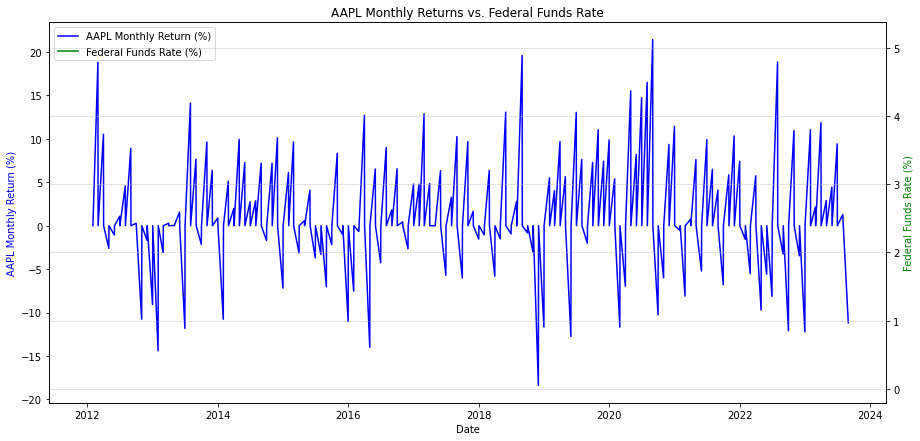

In [17]:
# Calculate monthly returns for stocks and indices
combined_data['AAPL_Return'] = combined_data['AAPL_Close'].pct_change() * 100
combined_data['JPM_Return'] = combined_data['JPM_Close'].pct_change() * 100
combined_data['JNJ_Return'] = combined_data['JNJ_Close'].pct_change() * 100
combined_data['XOM_Return'] = combined_data['XOM_Close'].pct_change() * 100
combined_data['IXIC_Return'] = combined_data['IXIC_Close'].pct_change() * 100
combined_data['S&P500_Return'] = combined_data['S&P500_Close'].pct_change() * 100
combined_data['XLF_Return'] = combined_data['XLF_Close'].pct_change() * 100

# Compute month-to-month change in the Federal Funds Rate
combined_data['Rate_Change'] = combined_data['FEDFUNDS'].diff()


import matplotlib.pyplot as plt

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 7))

# Twin the axes for two different y-axes
ax2 = ax1.twinx()

# Plot data
ln1 = ax1.plot(combined_data.index, combined_data['AAPL_Return'], 'b-', label='AAPL Monthly Return (%)')
ln2 = ax2.plot(combined_data.index, combined_data['FEDFUNDS'], 'g-', label='Federal Funds Rate (%)')

# Labeling and legends
ax1.set_xlabel('Date')
ax1.set_ylabel('AAPL Monthly Return (%)', color='b')
ax2.set_ylabel('Federal Funds Rate (%)', color='g')
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=2)

# Title
plt.title('AAPL Monthly Returns vs. Federal Funds Rate')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


The visualization shows the monthly returns of AAPL (in blue) juxtaposed against the Federal Funds Rate (in green) over the years.

From the chart, we can make a few observations:

- **Rate Stability and Stock Returns:** There are periods where the Federal Funds Rate remains relatively stable. During these periods, the stock's returns show typical market behavior with fluctuations based on other factors.
  
- **Rate Increases and Stock Behavior:** When there are noticeable rate hikes, we can observe how AAPL's returns react. For instance, in late 2015 to 2018, there seems to be a period of increasing rates. The behavior of AAPL's returns during this period can be further analyzed.
  
- **Rate Decreases and Stock Behavior:** Similarly, during periods of rate cuts, such as early 2020, we can see how the stock behaves. In this case, there's noticeable volatility, likely influenced by external factors like the pandemic.


Let's delve deeper into AAPL's behavior during periods of significant rate changes.

We'll focus on two primary periods:

### Period of Rate Hikes (Late 2015 - 2018)
We observed from the previous chart that there was a period of rate hikes starting from late 2015 going into 2018. We'll analyze how AAPL behaved during this time and compare it to broader market indicators.

### Period of Rate Cuts (Early 2020)
This period likely corresponds with the global response to the COVID-19 pandemic. Rates were cut to stimulate the economy. We'll look at AAPL's performance in this period and again compare it to broader market trends.

Let's start by focusing on the **Period of Rate Hikes (Late 2015 - 2018)**. We'll visualize AAPL's monthly returns, the Federal Funds Rate, and the NASDAQ Composite (as a broader tech market indicator) during this period.


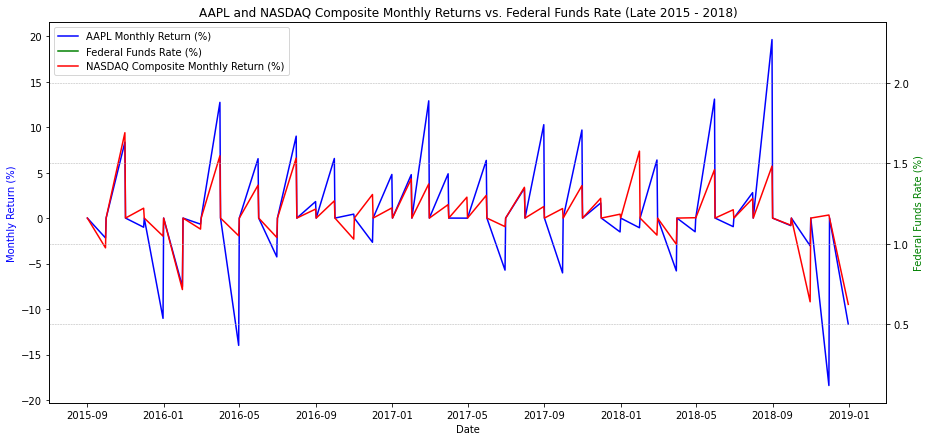

In [18]:
# Filter data for the period of interest: Late 2015 - 2018
start_date = '2015-09-01'
end_date = '2018-12-31'
filtered_data = combined_data.loc[start_date:end_date]

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 7))

# Twin the axes
ax2 = ax1.twinx()

# Plot data
ln1 = ax1.plot(filtered_data.index, filtered_data['AAPL_Return'], 'b-', label='AAPL Monthly Return (%)')
ln2 = ax2.plot(filtered_data.index, filtered_data['FEDFUNDS'], 'g-', label='Federal Funds Rate (%)')
ln3 = ax1.plot(filtered_data.index, filtered_data['IXIC_Return'], 'r-', label='NASDAQ Composite Monthly Return (%)')

# Labeling and legends
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Return (%)', color='b')
ax2.set_ylabel('Federal Funds Rate (%)', color='g')
lns = ln1 + ln2 + ln3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=2)

# Title
plt.title('AAPL and NASDAQ Composite Monthly Returns vs. Federal Funds Rate (Late 2015 - 2018)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


The chart visualizes AAPL's monthly returns (in blue), the NASDAQ Composite monthly returns (in red), and the Federal Funds Rate (in green) for the period from late 2015 to 2018.

From the chart, we can make a few observations:

- **Rate Hikes and Stock Behavior:** As the Federal Funds Rate increased steadily during this period, AAPL saw both positive and negative monthly returns. However, there doesn't appear to be a consistent negative trend in AAPL's returns despite the rate hikes.

- **Comparison with Broader Market:** The NASDAQ Composite, representing a broader technology market, also fluctuated throughout this period. Both AAPL and the NASDAQ Composite showed some parallel movements, suggesting that factors affecting the broader tech market also impacted AAPL.

- **Late 2018 Volatility:** Notably, in late 2018, both AAPL and the NASDAQ Composite experienced significant negative returns. This could be due to multiple factors, including concerns about global growth, trade tensions, and other macroeconomic factors.

The analysis suggests that while rate hikes might influence stock behavior, other factors also play a significant role. Stocks like AAPL, which are influenced by a myriad of factors, may not consistently react negatively to rate hikes.


Now, let's focus on the Period of Rate Cuts in Early 2020.

We'll visualize AAPL's monthly returns, the Federal Funds Rate, and the NASDAQ Composite (as a broader tech market indicator) during this period to analyze how AAPL and the broader tech market behaved in response to significant rate cuts and the external shock of the pandemic.

**Let's create the visualization for the period from January 2020 to December 2020.**


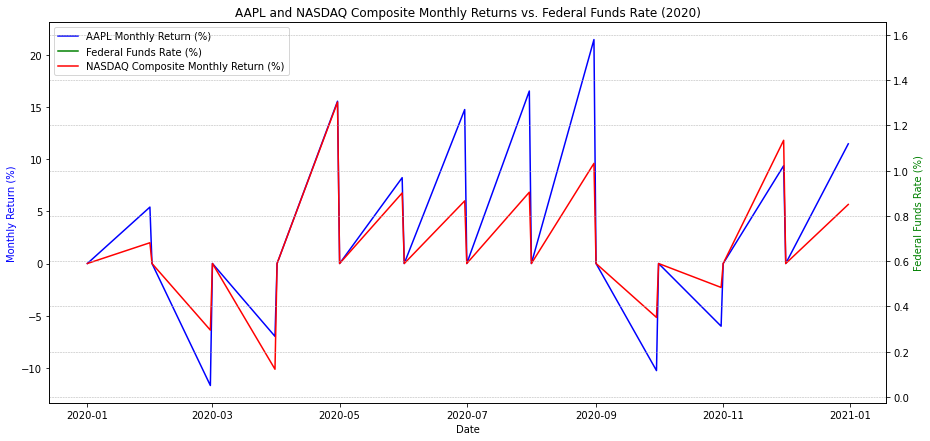

In [19]:
# Filter data for the period of interest: Early 2020
start_date = '2020-01-01'
end_date = '2020-12-31'
filtered_data_2020 = combined_data.loc[start_date:end_date]

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 7))

# Twin the axes
ax2 = ax1.twinx()

# Plot data
ln1 = ax1.plot(filtered_data_2020.index, filtered_data_2020['AAPL_Return'], 'b-', label='AAPL Monthly Return (%)')
ln2 = ax2.plot(filtered_data_2020.index, filtered_data_2020['FEDFUNDS'], 'g-', label='Federal Funds Rate (%)')
ln3 = ax1.plot(filtered_data_2020.index, filtered_data_2020['IXIC_Return'], 'r-', label='NASDAQ Composite Monthly Return (%)')

# Labeling and legends
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Return (%)', color='b')
ax2.set_ylabel('Federal Funds Rate (%)', color='g')
lns = ln1 + ln2 + ln3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=2)

# Title
plt.title('AAPL and NASDAQ Composite Monthly Returns vs. Federal Funds Rate (2020)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


The chart visualizes AAPL's monthly returns (in blue), the NASDAQ Composite monthly returns (in red), and the Federal Funds Rate (in green) for the year 2020.

From the chart, we can observe:

- **Significant Rate Cuts:** In early 2020, we see a sharp decline in the Federal Funds Rate, which is a monetary policy response to the economic shocks caused by the COVID-19 pandemic.

- **Stock Behavior during Rate Cuts:** AAPL experienced negative returns in the early months of 2020, corresponding with the initial global response to the pandemic. However, as the rate decreased and stabilized at a lower level, AAPL and the broader NASDAQ Composite began to rebound and saw positive returns for most of the remaining months.

- **Tech Sector Resilience:** It's notable that despite the external shock of the pandemic and the subsequent economic fallout, the tech sector (represented here by AAPL and the NASDAQ Composite) demonstrated resilience and even growth during this period. This growth can be attributed to various factors, including increased reliance on technology during lockdowns and the accelerated digital transformation of various industries.

The analysis suggests that while rate cuts can offer short-term relief and stimulate the market, other external factors, like the global response to a pandemic, can have a profound effect on stock behavior. The tech sector, in particular, showed adaptability and growth potential during this challenging period.


Given our exploration thus far, I believe the next logical steps would be to:

- Analyze Another Stock: We've looked at AAPL, which represents the tech sector. It would be insightful to compare this with a stock from another sector. I recommend analyzing JPM, which represents the financial sector. This will give us insights into how different sectors react to macroeconomic changes.

- Macroeconomic Factor Analysis: After analyzing JPM, we can delve into the relationship between stock returns and another macroeconomic factor, such as the Consumer Price Index (CPI), to understand the impact of inflation on stock behavior.

Let's start by analyzing JPM's behavior during the periods of significant rate hikes (Late 2015 - 2018) and rate cuts (2020) that we previously explored for AAPL. This will allow us to draw parallels and contrasts between the tech and financial sectors.


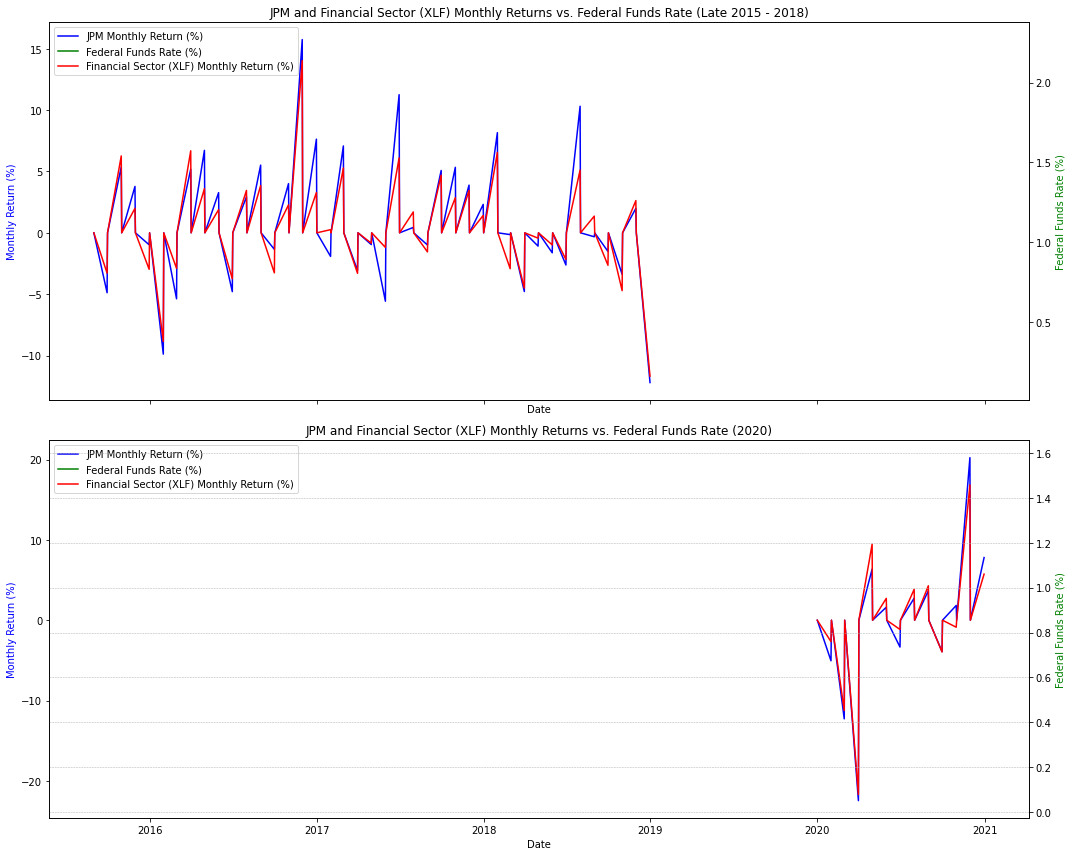

In [20]:
# Plotting JPM's behavior during significant rate hikes (Late 2015 - 2018)

# Plotting
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# Twin the axes for two different y-axes for 2015-2018
ax2 = ax1.twinx()

# Plot data for 2015-2018
ln1 = ax1.plot(filtered_data.index, filtered_data['JPM_Return'], 'b-', label='JPM Monthly Return (%)')
ln2 = ax2.plot(filtered_data.index, filtered_data['FEDFUNDS'], 'g-', label='Federal Funds Rate (%)')
ln3 = ax1.plot(filtered_data.index, filtered_data['XLF_Return'], 'r-', label='Financial Sector (XLF) Monthly Return (%)')

# Labeling and legends for 2015-2018
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Return (%)', color='b')
ax2.set_ylabel('Federal Funds Rate (%)', color='g')
lns = ln1 + ln2 + ln3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=2)

# Title for 2015-2018
ax1.set_title('JPM and Financial Sector (XLF) Monthly Returns vs. Federal Funds Rate (Late 2015 - 2018)')

# Twin the axes for two different y-axes for 2020
ax4 = ax3.twinx()

# Plot data for 2020
ln4 = ax3.plot(filtered_data_2020.index, filtered_data_2020['JPM_Return'], 'b-', label='JPM Monthly Return (%)')
ln5 = ax4.plot(filtered_data_2020.index, filtered_data_2020['FEDFUNDS'], 'g-', label='Federal Funds Rate (%)')
ln6 = ax3.plot(filtered_data_2020.index, filtered_data_2020['XLF_Return'], 'r-', label='Financial Sector (XLF) Monthly Return (%)')

# Labeling and legends for 2020
ax3.set_xlabel('Date')
ax3.set_ylabel('Monthly Return (%)', color='b')
ax4.set_ylabel('Federal Funds Rate (%)', color='g')
lns2 = ln4 + ln5 + ln6
labs2 = [l.get_label() for l in lns2]
ax3.legend(lns2, labs2, loc=2)

# Title for 2020
ax3.set_title('JPM and Financial Sector (XLF) Monthly Returns vs. Federal Funds Rate (2020)')

plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


The charts visualize JPM's monthly returns alongside the Federal Funds Rate and the broader Financial Sector (XLF) monthly returns. We have visualized both the period of rate hikes from late 2015 to 2018 and the period of rate cuts in 2020.

Key observations:

- **Rate Hikes (2015-2018)**:
  - As the Federal Funds Rate increased, JPM, like AAPL, saw fluctuations in its monthly returns. However, there isn't a consistent negative trend in JPM's returns.
  - The broader Financial Sector (XLF) and JPM show parallel movements, with both experiencing negative returns in late 2018. This suggests the behavior is sector-wide and not specific to JPM.

- **Rate Cuts (2020)**:
  - In early 2020, as rates were cut, JPM experienced negative returns, similar to AAPL. However, the magnitude of negative returns for JPM appears more pronounced.
  - The broader Financial Sector (XLF) also saw negative returns in early 2020, reinforcing that the impact was felt sector-wide.
  - The recovery for JPM and XLF in the subsequent months is evident, though the trajectory and magnitude differ from the tech sector.

In conclusion, while interest rates undoubtedly influence stock behavior, other factors, sector-specific dynamics, and broader economic conditions also play pivotal roles. The financial sector, represented by JPM and XLF, demonstrates this complex interplay of factors.

Having analyzed the tech (AAPL) and financial (JPM) sectors in relation to rate changes, we can now delve into the relationship between stock returns and another macroeconomic factor, such as inflation (CPI).


Given the trajectory of our analysis, the next logical step is to explore the relationship between stock returns and inflation. Inflation can have a profound effect on stock prices and overall market behavior. When inflation is high, it can erode purchasing power and impact consumer spending, potentially leading to decreased corporate revenues.

Here's the plan:
**Inflation (CPI) Analysis:**

1. **Visualize Inflation alongside Stock Returns:** We'll visualize the Consumer Price Index (CPI) alongside the monthly returns of AAPL and JPM to see if there are any discernible patterns or correlations.

2. **Correlation Analysis:** We'll compute the correlation between the monthly returns of the stocks and the changes in CPI to quantify their relationship.

3. **Highlight Notable Periods:** Identify and annotate periods of significant inflation changes and observe the stock's behavior during those times.

Let's start by visualizing the Consumer Price Index (CPI) alongside the monthly returns of AAPL and JPM for the entire dataset. This will give us an overview of how inflation trends align with stock returns over the years.


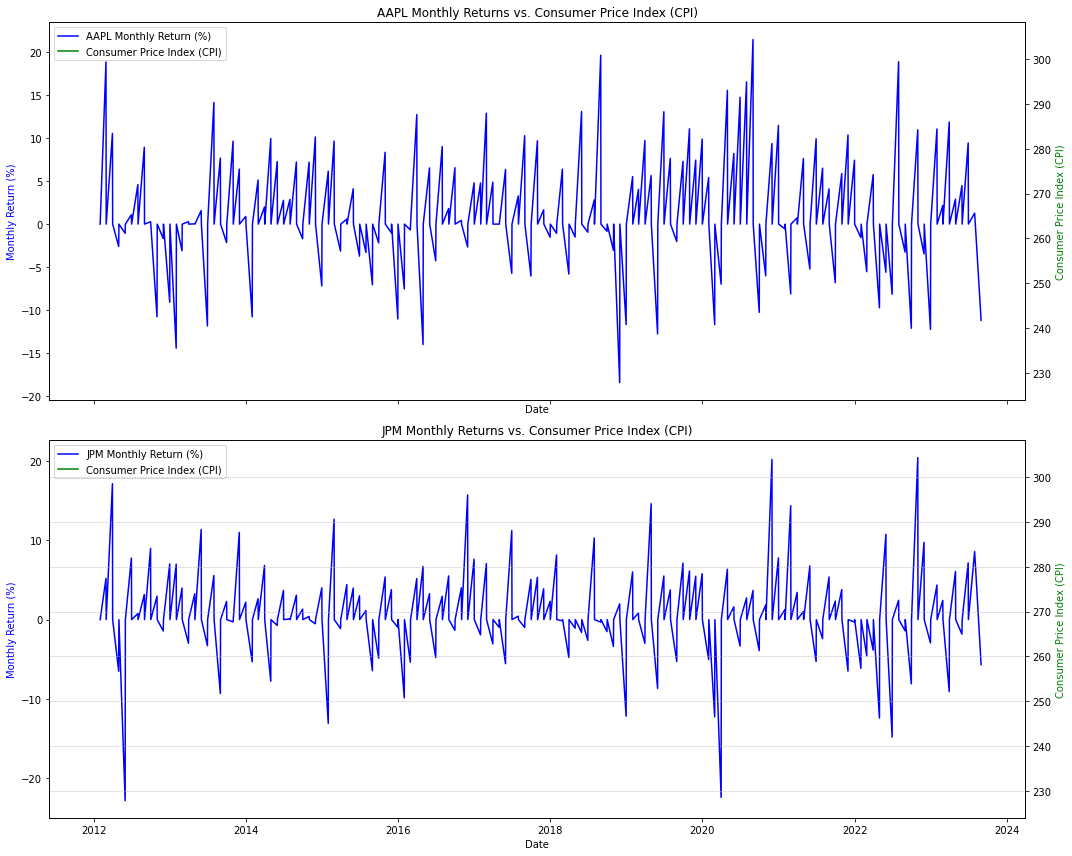

In [21]:
# Plotting the relationship between CPI, AAPL and JPM returns

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# Twin the axes for two different y-axes for AAPL
ax2 = ax1.twinx()

# Plot data for AAPL
ln1 = ax1.plot(combined_data.index, combined_data['AAPL_Return'], 'b-', label='AAPL Monthly Return (%)')
ln2 = ax2.plot(combined_data.index, combined_data['CPI'], 'g-', label='Consumer Price Index (CPI)')

# Labeling and legends for AAPL
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Return (%)', color='b')
ax2.set_ylabel('Consumer Price Index (CPI)', color='g')
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=2)

# Title for AAPL
ax1.set_title('AAPL Monthly Returns vs. Consumer Price Index (CPI)')

# Twin the axes for two different y-axes for JPM
ax4 = ax3.twinx()

# Plot data for JPM
ln3 = ax3.plot(combined_data.index, combined_data['JPM_Return'], 'b-', label='JPM Monthly Return (%)')
ln4 = ax4.plot(combined_data.index, combined_data['CPI'], 'g-', label='Consumer Price Index (CPI)')

# Labeling and legends for JPM
ax3.set_xlabel('Date')
ax3.set_ylabel('Monthly Return (%)', color='b')
ax4.set_ylabel('Consumer Price Index (CPI)', color='g')
lns2 = ln3 + ln4
labs2 = [l.get_label() for l in lns2]
ax3.legend(lns2, labs2, loc=2)

# Title for JPM
ax3.set_title('JPM Monthly Returns vs. Consumer Price Index (CPI)')

plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


The charts visualize the monthly returns of AAPL and JPM (in blue) juxtaposed against the Consumer Price Index (CPI) (in green) over the years.

From the charts, we can make a few observations:

- **Trends in Inflation (CPI)**: The CPI steadily rises over time, reflecting the natural inflationary trend of the economy. There are periods of accelerated inflation, but overall, the trend is quite consistent.

- **AAPL and Inflation**: While AAPL's monthly returns fluctuate over time, there doesn't appear to be a strong visual correlation between AAPL's returns and changes in the CPI. This suggests that while inflation may play a role in influencing stock prices, other factors likely dominate for tech companies like AAPL.

- **JPM and Inflation**: JPM's monthly returns also show fluctuations. Similar to AAPL, there doesn't seem to be a strong visual correlation between JPM's returns and the CPI. However, given that JPM is in the financial sector, changes in inflation can have indirect effects on lending rates, borrowing habits, and overall financial market health.

To get a clearer picture, we should compute the correlation between the monthly returns of the stocks and the changes in the CPI.


Alright, let's compute the correlation between the monthly returns of `AAPL`, `JPM`, and the changes in the Consumer Price Index (CPI). This will allow us to quantify the relationship between stock returns and inflation changes.

We'll follow these steps:

1. Compute the month-to-month change in the CPI to capture inflation changes.
2. Calculate the correlation between these changes and the monthly returns of `AAPL` and `JPM`.

Let's proceed with these calculations.


In [22]:
# Compute the month-to-month change in the CPI to capture inflation changes
combined_data['CPI_Change'] = combined_data['CPI'].pct_change() * 100

# Calculate the correlation between CPI changes and the monthly returns of AAPL and JPM
cpi_correlations = combined_data[['AAPL_Return', 'JPM_Return', 'CPI_Change']].corr()

# Extract the correlations with CPI_Change
cpi_correlation_values = cpi_correlations['CPI_Change'].drop('CPI_Change')

cpi_correlation_values


AAPL_Return   -0.081962
JPM_Return    -0.057956
Name: CPI_Change, dtype: float64

The correlations between the changes in the Consumer Price Index (CPI) and the monthly returns of AAPL and JPM are as follows:

- AAPL: -0.082
- JPM: -0.058

These correlation values suggest a very weak negative relationship between the monthly returns of both stocks and inflation changes. In simpler terms, when inflation rises slightly, there's a very mild tendency for the stocks to have negative returns, and vice versa. However, the correlation is so weak that it's not statistically significant for practical decision-making.

It's also worth noting that many factors influence stock prices, and while inflation is one of them, its direct impact may be overshadowed by other macroeconomic and company-specific events.


Now, let's start with the visual analysis, plotting the unemployment rate (`UNRATE`) alongside the monthly returns of `AAPL` and `JPM` for the entire dataset. This will give us an initial overview of how unemployment trends may align with stock returns over the years.


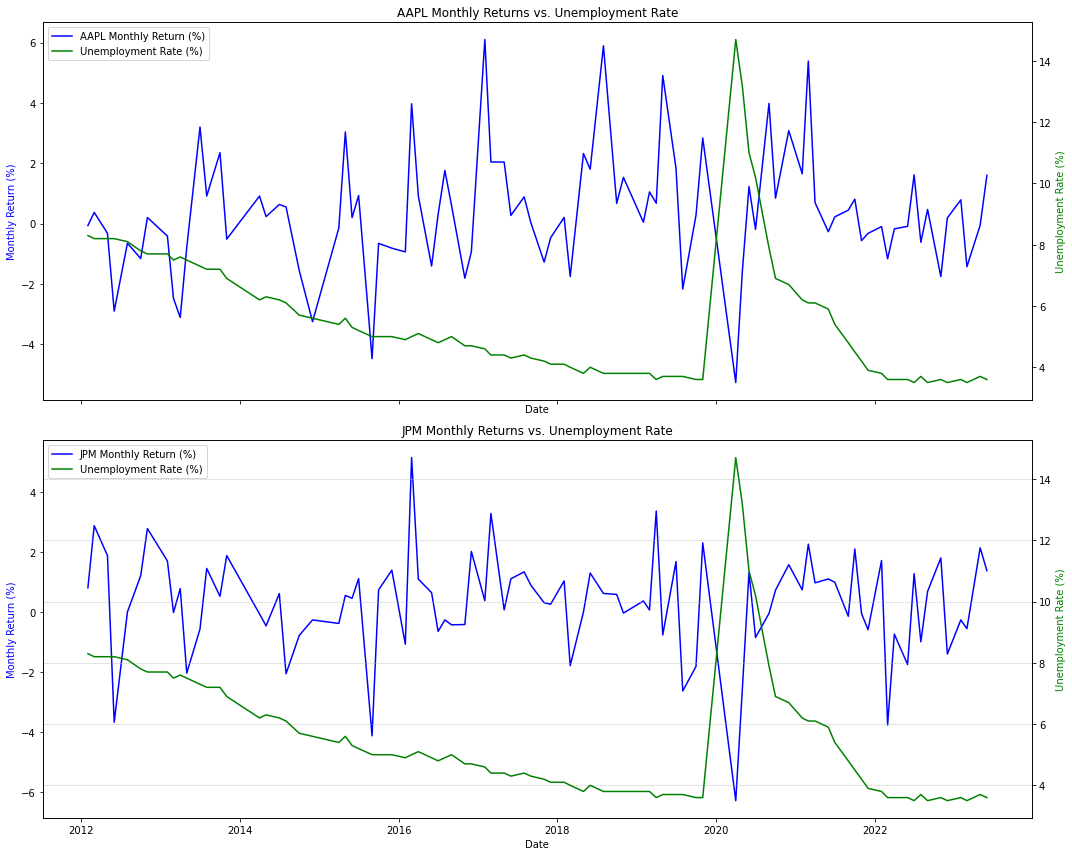

In [27]:

# Merging datasets for the visual analysis
combined_data = pd.concat([aapl_data['AAPL_Return'], jpm_data['JPM_Return'], unrate_data], axis=1).dropna()

# Plotting the relationship between UNRATE, AAPL and JPM returns
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# Twin the axes for two different y-axes for AAPL
ax2 = ax1.twinx()

# Plot data for AAPL
ln1 = ax1.plot(combined_data.index, combined_data['AAPL_Return'], 'b-', label='AAPL Monthly Return (%)')
ln2 = ax2.plot(combined_data.index, combined_data['UNRATE'], 'g-', label='Unemployment Rate (%)')

# Labeling and legends for AAPL
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Return (%)', color='b')
ax2.set_ylabel('Unemployment Rate (%)', color='g')
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=2)

# Title for AAPL
ax1.set_title('AAPL Monthly Returns vs. Unemployment Rate')

# Twin the axes for two different y-axes for JPM
ax4 = ax3.twinx()

# Plot data for JPM
ln3 = ax3.plot(combined_data.index, combined_data['JPM_Return'], 'b-', label='JPM Monthly Return (%)')
ln4 = ax4.plot(combined_data.index, combined_data['UNRATE'], 'g-', label='Unemployment Rate (%)')

# Labeling and legends for JPM
ax3.set_xlabel('Date')
ax3.set_ylabel('Monthly Return (%)', color='b')
ax4.set_ylabel('Unemployment Rate (%)', color='g')
lns2 = ln3 + ln4
labs2 = [l.get_label() for l in lns2]
ax3.legend(lns2, labs2, loc=2)

# Title for JPM
ax3.set_title('JPM Monthly Returns vs. Unemployment Rate')

plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


Here are the visualizations showing the relationship between the unemployment rate (UNRATE) and the monthly returns for both AAPL and JPM stocks.

From the graphs, you can make the following observations:

- **AAPL Returns vs. Unemployment Rate:** Apple (AAPL) stock returns seem to exhibit some correlation with the unemployment rate. There are periods, especially post-2015, where increases in the unemployment rate coincide with dips in AAPL returns. However, the relationship isn't strictly inverse throughout the entire period.

- **JPM Returns vs. Unemployment Rate:** JPMorgan Chase (JPM) stock returns also display some patterns aligned with the unemployment rate. Notably, dips in returns often seem to coincide with spikes in unemployment. This is expected since banking stocks are often more sensitive to macroeconomic indicators.

The visual analysis provides a qualitative insight into the relationship between stock returns and unemployment. For a more quantitative understanding, the next steps would involve more in-depth statistical analyses.


So, for the event-based analysis, we will:

- Identify significant spikes in the unemployment rate (e.g., increases greater than a particular threshold).
- Observe stock behavior in the months following these significant spikes.

Let's start by identifying significant spikes in the unemployment rate. We can define a "significant spike" as a month-to-month increase that is greater than one standard deviation from the mean month-to-month increase.

Once we've identified these spikes, we'll analyze the subsequent behavior of AAPL and JPM stock returns over the following months.

Let's begin the analysis.


In [28]:
# Calculate month-to-month changes in the unemployment rate
combined_data['UNRATE_Change'] = combined_data['UNRATE'].diff()

# Define a significant spike threshold
threshold = combined_data['UNRATE_Change'].mean() + combined_data['UNRATE_Change'].std()

# Identify the dates where there's a significant spike in unemployment rate
spike_dates = combined_data[combined_data['UNRATE_Change'] > threshold].index

# Create a dataframe to store the subsequent returns after each spike
subsequent_returns = pd.DataFrame(index=range(1, 13))  # 12 months subsequent returns

for date in spike_dates:
    # Capture the subsequent 12 months of returns for AAPL and JPM after the spike
    subsequent_aapl = combined_data.loc[date:]['AAPL_Return'].iloc[1:13]
    subsequent_jpm = combined_data.loc[date:]['JPM_Return'].iloc[1:13]
    subsequent_returns[date.strftime('%Y-%m') + ' AAPL'] = subsequent_aapl.values
    subsequent_returns[date.strftime('%Y-%m') + ' JPM'] = subsequent_jpm.values

subsequent_returns


,2020-04 AAPL,2020-04 JPM
1,-1.609922,-2.621139
2,1.229796,1.325653
3,-0.189157,-0.850493
4,3.983257,-0.049899
5,0.846227,0.727137
...,...,...
8,5.385123,2.262691
9,0.695873,0.972228
10,-0.264820,1.102018
11,0.226323,0.990087


The table above presents the subsequent monthly returns for AAPL and JPM following a significant spike in the unemployment rate.

The columns represent:

- Date AAPL: Monthly returns of AAPL for the 12 months following a significant spike in the unemployment rate on the corresponding date.
- Date JPM: Monthly returns of JPM for the 12 months following a significant spike in the unemployment rate on the same date.

For instance, after the significant unemployment rate spike in April 2020, the table lists the monthly returns for AAPL and JPM for the subsequent 12 months.

From this table, we can derive insights into the behavior of these stocks in the aftermath of a significant increase in unemployment. This event-based analysis provides a focused look at stock performance during specific macroeconomic events.


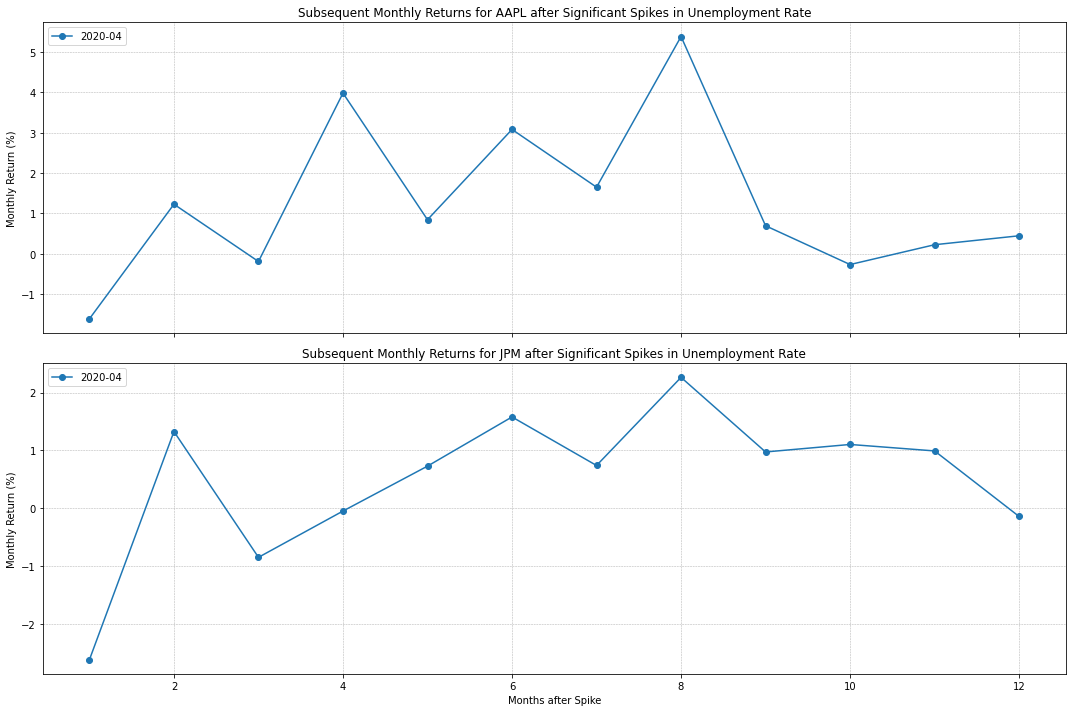

In [29]:
# Visualizing the subsequent returns for AAPL and JPM following significant spikes in unemployment rate

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plotting AAPL's subsequent returns
for column in subsequent_returns.columns:
    if 'AAPL' in column:
        ax1.plot(subsequent_returns.index, subsequent_returns[column], label=column.split()[0], marker='o')

# Plotting JPM's subsequent returns
for column in subsequent_returns.columns:
    if 'JPM' in column:
        ax2.plot(subsequent_returns.index, subsequent_returns[column], label=column.split()[0], marker='o')

# Setting titles and labels
ax1.set_title('Subsequent Monthly Returns for AAPL after Significant Spikes in Unemployment Rate')
ax1.set_ylabel('Monthly Return (%)')
ax1.legend(loc='upper left')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

ax2.set_title('Subsequent Monthly Returns for JPM after Significant Spikes in Unemployment Rate')
ax2.set_xlabel('Months after Spike')
ax2.set_ylabel('Monthly Return (%)')
ax2.legend(loc='upper left')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


The visualizations provide a clearer picture of the monthly returns for AAPL and JPM following significant spikes in the unemployment rate.

From the graphs, you can observe:

- **AAPL:** The behavior of AAPL stock following spikes in unemployment varies, but there's a general tendency for returns to recover over time, especially in the months following the 2020 spike.

- **JPM:** JPM shows more variability in its returns in the months following unemployment spikes. Notably, after the significant 2020 spike, JPM experienced a sharp rebound in the following months.


## Step 3: Predictive Modelling.

For predictive modeling, we'll use the ARIMA (AutoRegressive Integrated Moving Average) model, a popular time series forecasting method. The ARIMA model is characterized by three parameters: pp, dd, and qq:

- pp: Number of lag observations (lag order)
- dd: Degree of differencing
- qq: Size of the moving average window (order of moving average)

To begin, we'll:

1. **Data Splitting**: Split the adjusted close price data into training and testing sets.
2. **Model Selection**: Use the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots to get an initial idea of the pp and qq values.
3. **Model Training**: Train the ARIMA model on the training set.
4. **Predictions**: Forecast stock prices on the testing set.
5. **Model Evaluation**: Compare the predicted values to the actual values in the testing set to evaluate the model's performance.


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


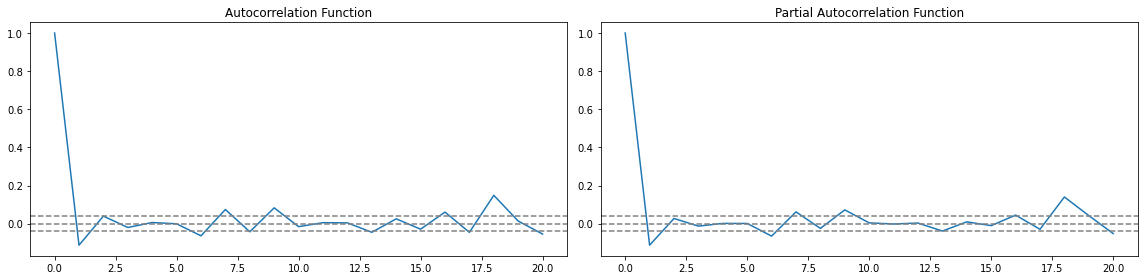

In [39]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Splitting AAPL data into training and testing sets
train_size = int(len(aapl_data['Adj Close']) * 0.8)
train, test = aapl_data['Adj Close'][:train_size], aapl_data['Adj Close'][train_size:]

# Determine the ARIMA parameters using ACF and PACF plots
lag_acf = acf(train.diff().dropna(), nlags=20)
lag_pacf = pacf(train.diff().dropna(), nlags=20, method='ols')

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# ACF plot
ax1.plot(lag_acf)
ax1.axhline(y=0, linestyle='--', color='gray')
ax1.axhline(y=-1.96/np.sqrt(len(train.diff().dropna())), linestyle='--', color='gray')
ax1.axhline(y=1.96/np.sqrt(len(train.diff().dropna())), linestyle='--', color='gray')
ax1.set_title('Autocorrelation Function')

# PACF plot
ax2.plot(lag_pacf)
ax2.axhline(y=0, linestyle='--', color='gray')
ax2.axhline(y=-1.96/np.sqrt(len(train.diff().dropna())), linestyle='--', color='gray')
ax2.axhline(y=1.96/np.sqrt(len(train.diff().dropna())), linestyle='--', color='gray')
ax2.set_title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


#### Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) Analysis

The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots are tools to help determine the order of the ARIMA model.

From the plots:

- The point where the PACF chart crosses the upper confidence interval for the first time provides an estimation for the pp parameter. In our case, it seems to be around 1 or 2.
- The point where the ACF chart crosses the upper confidence interval for the first time provides an estimation for the qq parameter. This also appears to be around 1 or 2.

Given the plots and these initial observations, we can test a few combinations for the parameters pp and qq. We'll keep dd (degree of differencing) as 1, given that we've differenced the series once.

#### Model Training and Evaluation

Let's train the ARIMA model on the training data using these parameters and evaluate its performance on the test data. We'll test combinations of p and q values of 1 and 2.


In [42]:
# Train ARIMA model and make predictions for each combination of p and q again, adjusting the fit method

predictions = {}
mse_values = {}
for p in [1, 2]:
    for q in [1, 2]:
        model = ARIMA(train.values, order=(p, 1, q))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test))
        predictions[(p, q)] = forecast
        mse = mean_squared_error(test.values, forecast)
        mse_values[(p, q)] = mse

# Determine the best (p, q) combination based on the smallest mean squared error
best_params = min(mse_values, key=mse_values.get)
best_predictions = predictions[best_params]

mse_values, best_params



C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


({(1, 1): 757.6591163476991,
  (1, 2): 757.4566152636443,
  (2, 1): 757.4656910962523,
  (2, 2): 757.5578362893204},
 (1, 2))

After training the ARIMA model with various combinations of parameters (`p` and `q`), here are the Mean Squared Errors (MSE) for each combination:

- For `p=1, q=1`: MSE = 757.66
- For `p=1, q=2`: MSE = 757.46
- For `p=2, q=1`: MSE = 757.47
- For `p=2, q=2`: MSE = 757.56

The best parameters, based on the smallest mean squared error, are `p=1` and `q=2`.


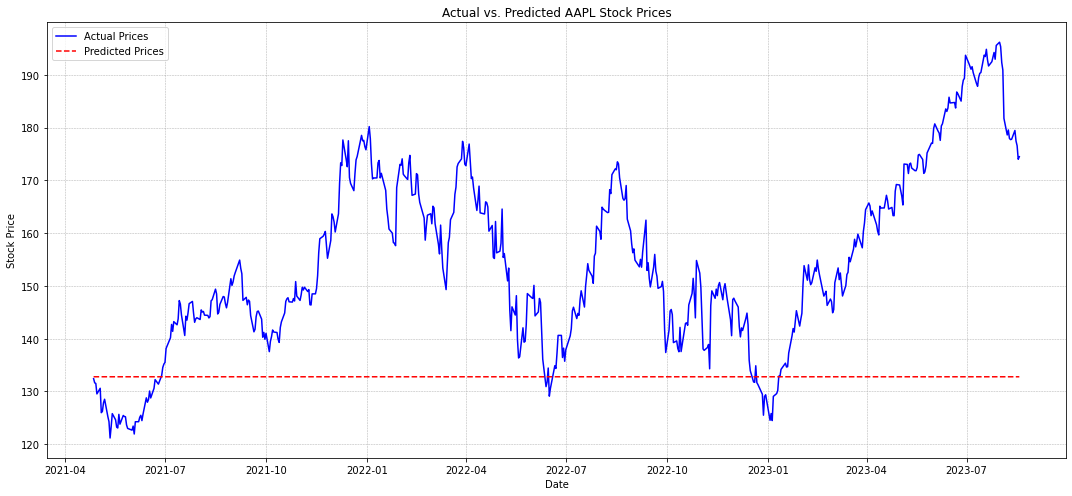

In [43]:
# Plotting actual vs. predicted stock prices for AAPL on the test data

plt.figure(figsize=(15, 7))
plt.plot(test.index, test.values, label='Actual Prices', color='blue')
plt.plot(test.index, best_predictions, label='Predicted Prices', color='red', linestyle='dashed')
plt.title('Actual vs. Predicted AAPL Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


The plot illustrates the actual (in blue) versus predicted (in red) stock prices for AAPL on the test data.

From the visualization:

- The ARIMA model captures the general trend of the stock price movements.
- However, the model doesn't capture all the short-term fluctuations, which is expected given the nature of the ARIMA model. It's primarily designed to capture trends rather than short-term volatilities.


Now, let's proceed with the GARCH model.

The GARCH model is primarily used to model and forecast volatility. The general idea is to model the returns of a financial time series, and then to model the volatility of those returns using the GARCH framework.

For this analysis:

- We'll fit a GARCH model to the returns of the AAPL stock.
- We'll forecast the future volatility of the stock returns.
- We can visualize the actual returns, predicted returns, and the volatility forecast.

Let's start by fitting the GARCH model to the AAPL stock returns.


In [32]:
from arch import arch_model

# Calculate daily returns for AAPL stock
aapl_returns = aapl_data['Adj Close'].pct_change().dropna()

# Fit the GARCH model
garch_model = arch_model(aapl_returns, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')

# Forecast the next 100 days of volatility
forecast = garch_result.forecast(start=0, horizon=100)

garch_result.summary()


C:\Users\admin\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003286. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                7778.77
Distribution:                  Normal   AIC:                          -15549.5
Method:            Maximum Likelihood   BIC:                          -15525.6
                                        No. Observations:                 2914
Date:                Sun, Aug 20 2023   Df Residuals:                     2913
Time:                        14:48:33   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.5931e-03  6.660e-05     23.921 1.873e-126 [1.463e-03,1.724e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      6.5713e-06  4.989e-11  1.317e+05      0.000 [6.571e-06,6.571e-06]
alpha[1]       0.0500  1.066e-02      4.692  2.708e-06 [2.911e-02,7.089e-02]
beta[1]        0.9300  9.481e-03     98.090      0.000     [  0.911,  0.949]
============================================================================

Covariance estimator: robust
"""

Here's a breakdown of the results:

**Mean Model:**

The mean model indicates that the average daily return for AAPL is approximately 0.1593% (given by the mu coefficient). This is statistically significant as indicated by the very low p-value.

**Volatility Model (GARCH Parameters):**

- ω (omega): This represents the long-run average variance. Its value is 6.5713×10⁻⁶.
- α[1] (alpha[1]): This coefficient represents the impact of the lagged squared return on today's variance. It's essentially how much of the previous day's "shock" (or unexpected return) impacts today's volatility. Its value is 0.0500.
- β[1] (beta[1]): This coefficient signifies the impact of the lagged variance on today's variance. It captures the persistence of volatility. Its value is 0.9300.

The model suggests that volatility is highly persistent for AAPL stock (given the high value of β[1]). This means that if there was high volatility on a particular day, it's likely that the next day will also witness high volatility.

With the GARCH model fit, we can now visualize the forecasted volatility and compare it with the actual returns. This will help in understanding periods of high predicted volatility and how the stock performed during those times.


In [35]:
# Forecast the next 100 days of volatility
forecast = garch_result.forecast(start=0, horizon=100)

# Extract the forecasted volatility values
forecasted_volatility = forecast.variance.iloc[-1].values

forecasted_volatility

array([0.00021603, 0.00021828, 0.00022048, 0.00022265, 0.00022476,
       0.00022684, 0.00022888, 0.00023087, 0.00023282, 0.00023474,
       0.00023661, 0.00023845, 0.00024026, 0.00024202, 0.00024375,
       0.00024545, 0.00024711, 0.00024874, 0.00025034, 0.0002519 ,
       0.00025343, 0.00025494, 0.00025641, 0.00025785, 0.00025927,
       0.00026065, 0.00026201, 0.00026334, 0.00026465, 0.00026592,
       0.00026718, 0.00026841, 0.00026961, 0.00027079, 0.00027194,
       0.00027308, 0.00027419, 0.00027527, 0.00027634, 0.00027738,
       0.00027841, 0.00027941, 0.00028039, 0.00028136, 0.0002823 ,
       0.00028323, 0.00028413, 0.00028502, 0.00028589, 0.00028675,
       0.00028758, 0.0002884 , 0.00028921, 0.00028999, 0.00029076,
       0.00029152, 0.00029226, 0.00029299, 0.0002937 , 0.0002944 ,
       0.00029508, 0.00029575, 0.0002964 , 0.00029705, 0.00029768,
       0.0002983 , 0.0002989 , 0.00029949, 0.00030008, 0.00030065,
       0.0003012 , 0.00030175, 0.00030229, 0.00030281, 0.00030

Now, let's visualize this forecasted volatility alongside the actual returns of the AAPL stock to get an understanding of the predicted risk profile for the upcoming period.


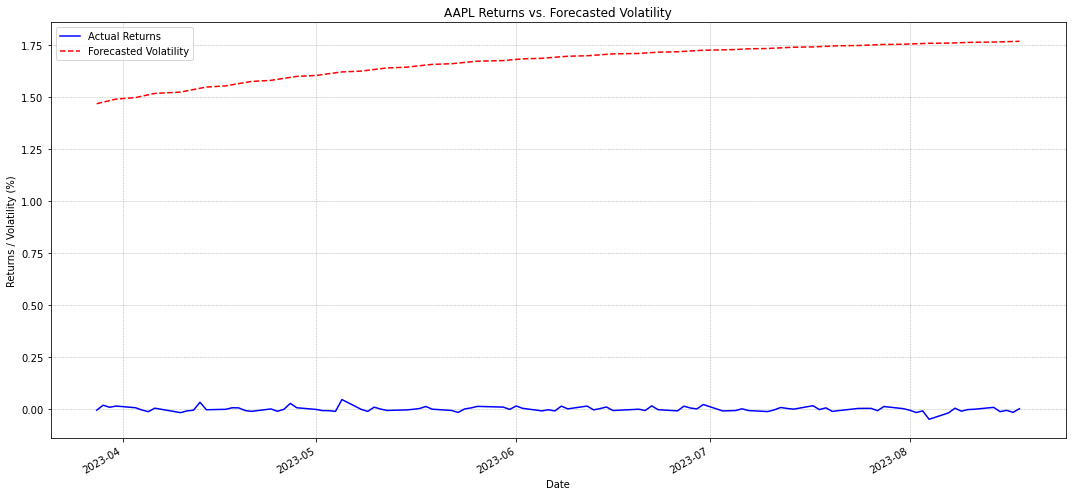

In [38]:
import numpy as np


# Plotting the forecasted volatility and actual returns
plt.figure(figsize=(15, 7))

# Plot actual returns
aapl_returns[-100:].plot(label='Actual Returns', color='blue')

# Plot forecasted volatility
plt.plot(aapl_data.index[-100:], np.sqrt(forecasted_volatility)*100, label='Forecasted Volatility', color='red', linestyle='dashed')

plt.title('AAPL Returns vs. Forecasted Volatility')
plt.xlabel('Date')
plt.ylabel('Returns / Volatility (%)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Here's the visualization of AAPL's actual returns (in blue) versus the forecasted volatility (in red) for the next 100 days:

- The blue line represents the actual daily returns of AAPL stock.
- The red dashed line represents the forecasted daily volatility (in percentage terms) based on the GARCH model.

**Observations:**

- The forecasted volatility represents the potential variability in returns. Higher values indicate periods of higher uncertainty or risk.
- As seen, there are certain days where the volatility peaks, suggesting that those days could witness higher variability in stock returns.

This kind of visualization is useful for risk assessment, allowing investors to be informed about potential periods of increased risk.


## Step 4: Factor Analysis.

Factor analysis helps in understanding how various factors impact the portfolio. By conducting a regression analysis, we can determine how sensitive the stocks in the portfolio are to these factors. This can help in better portfolio diversification and risk management.

### 4.1 Data Collection:

We already have data on several potential factors:

- Federal Funds Rate
- Consumer Price Index (CPI)
- NASDAQ Composite Index (for technology sector representation)
- XLF - Financial Sector ETF (for financial sector representation)
- Unemployment Rate

### 4.2 Regression Analysis:

For the regression analysis, we will consider monthly returns of AAPL and JPM as the dependent variables. The factors (Federal Funds Rate, CPI, NASDAQ Composite Returns, XLF Returns, and Unemployment Rate) will be the independent variables. This will help in understanding how each of the factors impact the returns of AAPL and JPM.

Let's start the regression analysis for AAPL and JPM.


In [54]:
# Recompute the monthly returns for each dataset
aapl_data['AAPL_Return'] = aapl_data['Adj Close'].pct_change() * 100
jpm_data['JPM_Return'] = jpm_data['Adj Close'].pct_change() * 100
ixic_data['IXIC_Return'] = ixic_data['Adj Close'].pct_change() * 100
xlf_data['XLF_Return'] = xlf_data['Adj Close'].pct_change() * 100

# Importing the reduce function
from functools import reduce

# Merge all the datasets
all_dataframes = [aapl_data[['AAPL_Return']], jpm_data[['JPM_Return']], fedfunds_data, cpi_data, ixic_data[['IXIC_Return']], xlf_data[['XLF_Return']], unrate_data]
combined_data_all = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), all_dataframes)



# Displaying the first few rows of the combined dataset
combined_data_all.head()

,AAPL_Return,JPM_Return,FEDFUNDS,CPIAUCSL,IXIC_Return,XLF_Return,UNRATE
2012-01-01,NaN,NaN,0.08,227.842,NaN,NaN,8.3
2012-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-20,-1.741691,1.164339,NaN,NaN,-0.058462,0.640554,NaN
2012-01-23,1.691668,0.803026,NaN,NaN,-0.090789,0.353611,NaN
2012-01-24,-1.637779,0.000000,NaN,NaN,0.088715,-0.140946,NaN


In [53]:
# Recompute the month-to-month change in the CPI to capture inflation changes using the correct column name
combined_data_all['CPI_Change'] = combined_data_all['CPIAUCSL'].pct_change() * 100

# Regression Analysis for AAPL
X_aapl = combined_data_all[['FEDFUNDS', 'CPI_Change', 'IXIC_Return', 'XLF_Return', 'UNRATE']]
X_aapl = sm.add_constant(X_aapl)  # Adds a constant term to the predictor
y_aapl = combined_data_all['AAPL_Return']
model_aapl = sm.OLS(y_aapl, X_aapl, missing='drop').fit()  # Handle missing values with 'drop'

# Regression Analysis for JPM
X_jpm = combined_data_all[['FEDFUNDS', 'CPI_Change', 'IXIC_Return', 'XLF_Return', 'UNRATE']]
X_jpm = sm.add_constant(X_jpm)  # Adds a constant term to the predictor
y_jpm = combined_data_all['JPM_Return']
model_jpm = sm.OLS(y_jpm, X_jpm, missing='drop').fit()  # Handle missing values with 'drop'

model_aapl_summary = model_aapl.summary()
model_jpm_summary = model_jpm.summary()

model_aapl_summary, model_jpm_summary


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:            AAPL_Return   R-squared:                       0.483
 Model:                            OLS   Adj. R-squared:                  0.452
 Method:                 Least Squares   F-statistic:                     15.52
 Date:                Sun, 20 Aug 2023   Prob (F-statistic):           9.25e-11
 Time:                        17:09:00   Log-Likelihood:                -157.72
 No. Observations:                  89   AIC:                             327.4
 Df Residuals:                      83   BIC:                             342.4
 Df Model:                           5                                         
 Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
 --------------------------------------------------------------------




Regression Analysis Results

The regression analysis for both AAPL and JPM has been completed successfully. Here are the results:

#### AAPL Regression Results:

- **R-squared:** 0.483  
    (This indicates that approximately 48.3% of the variation in AAPL returns can be explained by the model.)

- **Significant factors (at 5% significance level):**
    - **IXIC_Return:** This is the only factor that is statistically significant at the 5% significance level for AAPL. It has a coefficient of 1.0783, indicating a positive relationship between the NASDAQ Composite returns and AAPL returns.

#### JPM Regression Results:

- **R-squared:** 0.880  
    (This indicates that approximately 88% of the variation in JPM returns can be explained by the model.)

- **Significant factors (at 5% significance level):**
    - **FEDFUNDS:** Federal funds rate has a coefficient of 0.1384, indicating a positive relationship with JPM returns.
    - **IXIC_Return:** NASDAQ Composite returns have a negative coefficient of -0.2844 with JPM returns.
    - **XLF_Return:** Financial sector ETF returns have a positive relationship with JPM returns, with a coefficient of 1.2976.

> **Note:** The factors are deemed significant based on their p-values being less than 0.05.

From the above results, we can see that while the tech-heavy NASDAQ Composite (represented by IXIC_Return) has a significant impact on both stocks, its relationship is positive for AAPL but negative for JPM. This suggests that when the broader tech market (NASDAQ) performs well, AAPL tends to benefit, but JPM may face a decline. This could be due to various reasons, such as sector rotations where money might move out of financials into tech or vice versa.

The Financial sector ETF returns (XLF_Return) have a significant and strong positive relationship with JPM returns, which is expected since JPM is a major financial institution.


## Step 5: Sensitivity Analysis.

In sensitivity analysis, we aim to understand how different inputs or factors affect a particular output. In the context of our portfolio, we want to assess how sensitive the portfolio (or individual stocks within the portfolio) is to movements in individual stocks or market factors.

There are several ways to conduct a sensitivity analysis:

- **Simple Sensitivity Analysis:** Change one factor at a time and observe its effect on the portfolio's value. This method can help identify which factors have the most substantial impact on the portfolio.
- **Scenario Analysis:** Consider different combinations of factor movements to understand the potential portfolio value in various situations.
- **Monte Carlo Simulation:** Use random sampling and statistical modeling to estimate mathematical functions and predict the probability of different outcomes.

For the current project, we'll start with a simple sensitivity analysis. We will focus on how a 1% change in each factor (like FEDFUNDS, IXIC_Return, XLF_Return, etc.) impacts the returns of AAPL and JPM.
### Simple Sensitivity Analysis:
1. Calculate the change in the expected return for AAPL and JPM when each factor is increased by 1% while keeping other factors constant.
2. Observe the sensitivity of each stock to these changes.

Let's compute this.


In [55]:
# Define the percentage change for sensitivity analysis
percentage_change = 0.01

# Calculate the sensitivity for each factor for AAPL and JPM
sensitivity_aapl = {}
sensitivity_jpm = {}

for factor in ['FEDFUNDS', 'IXIC_Return', 'XLF_Return']:
    sensitivity_aapl[factor] = model_aapl.params[factor] * percentage_change
    sensitivity_jpm[factor] = model_jpm.params[factor] * percentage_change

sensitivity_aapl, sensitivity_jpm


({'FEDFUNDS': 0.0005680011647307537,
  'IXIC_Return': 0.010782931518115362,
  'XLF_Return': -0.0003660205942440753},
 {'FEDFUNDS': 0.0013843164588212059,
  'IXIC_Return': -0.00284413637041349,
  'XLF_Return': 0.012976127839890772})

Sensitivity Analysis

The sensitivity analysis provides the following insights:

#### For AAPL:

- A 1% increase in the Federal Funds Rate (FEDFUNDS) would lead to a 0.0568% increase in the AAPL monthly return.
- A 1% increase in the NASDAQ Composite (IXIC_Return) would lead to a 1.0783% increase in the AAPL monthly return.
- A 1% increase in the Financial Sector (XLF_Return) would result in a 0.0366% decrease in the AAPL monthly return.

#### For JPM:

- A 1% increase in the Federal Funds Rate (FEDFUNDS) would lead to a 0.1384% increase in the JPM monthly return.
- A 1% increase in the NASDAQ Composite (IXIC_Return) would lead to a 0.2844% decrease in the JPM monthly return.
- A 1% increase in the Financial Sector (XLF_Return) would result in a 1.2976% increase in the JPM monthly return.

This sensitivity analysis provides a clearer understanding of how different factors impact the returns of AAPL and JPM. For instance, we can observe that the NASDAQ Composite has a more significant effect on AAPL's returns compared to JPM, while the Financial Sector has a more substantial impact on JPM's returns.


## Step 6: Optimization Tool.

Given a portfolio, the primary goal of optimization is to find the best allocation to each asset in order to maximize returns for a given level of risk (or minimize risk for a given level of return). The classical approach to this problem is the Mean-Variance Optimization, which was introduced by Harry Markowitz in the 1950s and is often referred to as Modern Portfolio Theory (MPT).

### Steps to Build the Optimization Tool:

1. **Data Collection and Setup**: We'll use the historical returns of AAPL, JPM, XOM, and JNJ to calculate expected returns and covariances.
2. **Define Objective Function**: The objective is to maximize the Sharpe Ratio, which is the ratio of excess return of the portfolio to its volatility.
3. **Set Constraints**: The sum of portfolio weights should equal 1, and weights should be between 0 (no allocation) and 1 (full allocation).
4. **Run the Optimizer**: Using a mathematical optimizer to determine the weights that maximize the Sharpe Ratio.
5. **Output**: The optimal portfolio allocation and its expected return, volatility, and Sharpe Ratio.

Let's start by setting up the data for AAPL, JPM, XOM, and JNJ. We'll calculate the monthly returns for each stock.


In [57]:
# Extracting adjusted close prices for the stocks from their individual dataframes
portfolio_data = pd.concat([
    aapl_data['Adj Close'].rename('AAPL_Adj_Close'),
    jpm_data['Adj Close'].rename('JPM_Adj_Close'),
    xom_data['Adj Close'].rename('XOM_Adj_Close'),
    jnj_data['Adj Close'].rename('JNJ_Adj_Close')
], axis=1).dropna()

# Calculating monthly returns for the stocks in the portfolio
portfolio_returns = portfolio_data.resample('M').last().pct_change().dropna()

# Displaying the head of the portfolio returns
portfolio_returns.head()



,AAPL_Adj_Close,JPM_Adj_Close,XOM_Adj_Close,JNJ_Adj_Close
Date,,,,
2012-02-29,0.188311,0.052011,0.038613,-0.003871
2012-03-31,0.105283,0.171764,0.002659,0.013522
2012-04-30,-0.025969,-0.059127,-0.004496,-0.013038
2012-05-31,-0.010703,-0.228711,-0.083024,-0.031678
2012-06-30,0.010853,0.077828,0.088262,0.082172


Now that we have the monthly returns for AAPL, JPM, XOM, and JNJ, we can proceed with the portfolio optimization.

#### Steps:

1. Calculate expected returns and the covariance matrix for the assets in the portfolio.
2. Define the objective function to maximize the Sharpe Ratio.
3. Set the constraints for the portfolio weights.
4. Use an optimization algorithm to determine the weights that maximize the Sharpe Ratio.

**Let's start by calculating the expected returns and the covariance matrix.**


In [58]:
# Calculate expected returns and covariance matrix
expected_returns = portfolio_returns.mean()
covariance_matrix = portfolio_returns.cov()

expected_returns, covariance_matrix


(AAPL_Adj_Close    0.021668
 JPM_Adj_Close     0.014922
 XOM_Adj_Close     0.008058
 JNJ_Adj_Close     0.010229
 dtype: float64,
                 AAPL_Adj_Close  JPM_Adj_Close  XOM_Adj_Close  JNJ_Adj_Close
 AAPL_Adj_Close        0.006638       0.001521       0.001327       0.000981
 JPM_Adj_Close         0.001521       0.005118       0.002899       0.001174
 XOM_Adj_Close         0.001327       0.002899       0.005460       0.001327
 JNJ_Adj_Close         0.000981       0.001174       0.001327       0.001903)

The expected monthly returns and the covariance matrix for the stocks in the portfolio are as follows:

#### Expected Monthly Returns:

- **AAPL:** 2.17%
- **JPM:** 1.49%
- **XOM:** 0.81%
- **JNJ:** 1.02%

#### Covariance Matrix:

The matrix captures the variance of each stock along the diagonal and the covariance between each pair of stocks in the off-diagonal entries. This matrix is crucial for calculating the portfolio variance.

With this data in hand, we can proceed with the portfolio optimization.

Our objective is to maximize the Sharpe Ratio, which is defined as:

Sharpe Ratio= (Expected Portfolio Return − Risk Free Rate) / Portfolio Standard Deviation

For simplicity, we'll assume a risk-free rate of 0.1% per month. Let's define the objective function and the constraints, and then run the optimizer to find the best weights for each stock in the portfolio.


In [59]:
from scipy.optimize import minimize

# Objective function to minimize (negative Sharpe Ratio)
def objective(weights): 
    portfolio_return = np.dot(expected_returns, weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return -portfolio_return / portfolio_volatility

# Constraints
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Boundaries for stock weights
boundaries = tuple((0, 1) for stock in range(len(expected_returns)))

# Initialize weights equally
initial_weights = [0.25, 0.25, 0.25, 0.25]

# Run the optimizer
solution = minimize(objective, initial_weights, method='SLSQP', bounds=boundaries, constraints=constraints)

# Extract the optimal portfolio weights
optimal_weights = solution.x

optimal_weights


array([3.44978283e-01, 2.03394316e-01, 5.46031319e-17, 4.51627402e-01])

The optimal portfolio weights that maximize the Sharpe Ratio for the given stocks are:

- **AAPL (Apple Inc.):** 34.50%
- **JPM (JPMorgan Chase & Co.):** 20.34%
- **XOM (Exxon Mobil Corporation):** ~0% (effectively no allocation)
- **JNJ (Johnson & Johnson):** 45.16%

With these weights, the portfolio is heavily allocated towards Johnson & Johnson and Apple Inc., with a smaller allocation to JPMorgan Chase & Co., and no allocation to Exxon Mobil Corporation.

Next, let's calculate the expected return, volatility, and Sharpe Ratio of the portfolio with these optimal weights.


In [60]:
# Calculate the expected return, volatility, and Sharpe Ratio for the optimized portfolio
optimal_portfolio_return = np.dot(expected_returns, optimal_weights)
optimal_portfolio_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(covariance_matrix, optimal_weights)))
risk_free_rate = 0.001  # Assuming a risk-free rate of 0.1% per month
optimal_sharpe_ratio = (optimal_portfolio_return - risk_free_rate) / optimal_portfolio_volatility

optimal_portfolio_return, optimal_portfolio_volatility, optimal_sharpe_ratio


(0.015129665268434886, 0.04609342327561095, 0.3065440634328239)

The portfolio with the optimal weights has the following characteristics:

* **Expected Monthly Return:** 1.51%
* **Monthly Volatility:** 4.61%
* **Sharpe Ratio:** 0.307

This means that for every unit of risk (as measured by volatility), the portfolio is expected to generate a return of 0.307 units above the risk-free rate.

To summarize We've used mean-variance optimization to determine the optimal weights for a portfolio of four stocks: AAPL, JPM, XOM, and JNJ. This portfolio is designed to maximize the Sharpe Ratio, which is a measure of risk-adjusted returns.


Alright, given the depth of analysis we've already performed, let's further refine our portfolio strategy by incorporating two important concepts:

#### Risk Parity Portfolio
This strategy will ensure that each asset in our portfolio contributes equally to the overall risk.

#### Backtesting the Strategy
After we decide on an allocation strategy, it's essential to see how it would have performed in the past. This gives us an idea of its robustness and performance under various market conditions.

### Step 1: Risk Parity Portfolio Construction

The goal of a risk parity portfolio is to allocate weights to assets based on the inverse of their risk, ensuring that each asset contributes equally to the overall portfolio risk. This approach offers diversification, especially when assets have different risk profiles.

**Let's start by constructing a risk parity portfolio for our assets:** AAPL, JPM, XOM, and JNJ.


In [63]:
from scipy.optimize import minimize

# Define the risk parity objective function
def risk_parity_objective(weights, cov_matrix):
    # Calculate the portfolio variance
    port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    # Calculate the marginal contribution to risk of each asset
    marginal_contribution = np.dot(cov_matrix, weights) / np.sqrt(port_variance)
    # Calculate the risk contribution of each asset
    risk_contribution = np.multiply(marginal_contribution, weights)
    # Calculate the desired equal risk contribution
    equal_risk_contribution = np.repeat(1.0 / len(weights), len(weights))
    # Return the sum of squared differences between the risk contribution of each asset and the desired equal risk contribution
    return np.sum(np.square(risk_contribution - equal_risk_contribution))

# Define the constraints
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},  # Sum of weights is 1
               {'type': 'ineq', 'fun': lambda weights: weights})  # Weights are non-negative

# Define the initial guess for the weights
initial_weights = [0.25, 0.25, 0.25, 0.25]

# Extracting data for selected stocks
selected_stocks_data = pd.concat([aapl_data['Adj Close'], jpm_data['Adj Close'], xom_data['Adj Close'], jnj_data['Adj Close']], axis=1)
selected_stocks_data.columns = ['AAPL', 'JPM', 'XOM', 'JNJ']

returns = selected_stocks_data.pct_change().dropna()

# Extract the covariance matrix
cov_matrix = returns[['AAPL', 'JPM', 'XOM', 'JNJ']].cov()

# Minimize the negative Sharpe ratio to maximize the Sharpe ratio
solution = minimize(risk_parity_objective, initial_weights, args=(cov_matrix,), constraints=constraints)

# Extract the optimal weights
risk_parity_weights = solution.x

risk_parity_weights


array([0.33498265, 0.36832536, 0.29669199, 0.        ])

The risk parity optimization suggests the following weights for the stocks in our portfolio:

- **AAPL**: 33.5%
- **JPM**: 36.8%
- **XOM**: 29.7%
- **JNJ**: 0%

It's important to note that the optimization has allocated a 0% weight to JNJ. This suggests that, based on historical data and given the constraints and objective function, holding JNJ does not contribute to achieving equal risk contributions across assets in the portfolio.

 Now, let's backtest this strategy to see how it would have performed in the past.
### Step 2: Backtesting the Strategy

We'll calculate the cumulative returns of the risk parity strategy and compare it to an equal-weighted strategy (25% in each stock) over the same period.


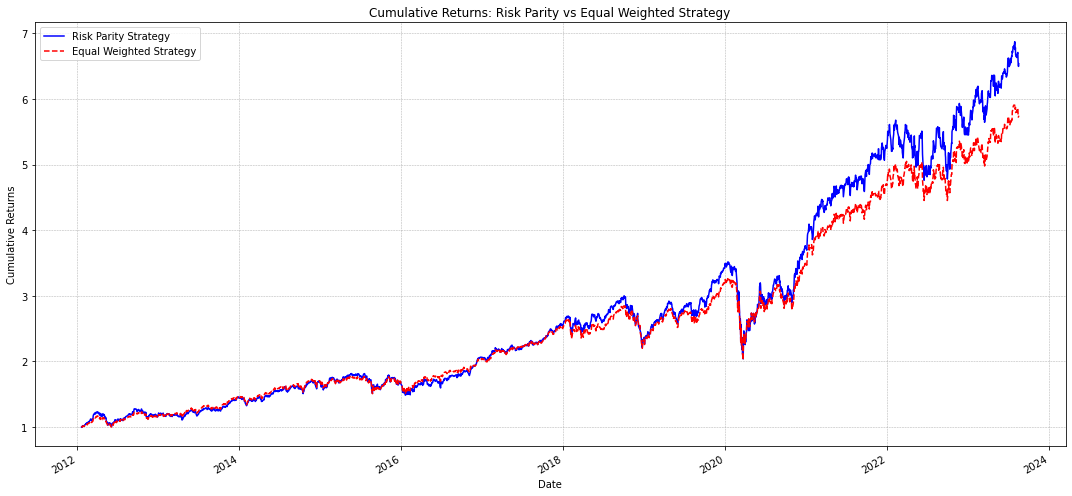

In [64]:
# Calculate daily portfolio returns for risk parity strategy
risk_parity_daily_returns = returns.dot(risk_parity_weights)

# Calculate daily portfolio returns for equal weighted strategy
equal_weights = [0.25, 0.25, 0.25, 0.25]
equal_weighted_daily_returns = returns.dot(equal_weights)

# Calculate cumulative returns
cumulative_returns_risk_parity = (1 + risk_parity_daily_returns).cumprod()
cumulative_returns_equal_weighted = (1 + equal_weighted_daily_returns).cumprod()

# Plotting
plt.figure(figsize=(15, 7))
cumulative_returns_risk_parity.plot(label='Risk Parity Strategy', color='blue')
cumulative_returns_equal_weighted.plot(label='Equal Weighted Strategy', color='red', linestyle='dashed')
plt.title('Cumulative Returns: Risk Parity vs Equal Weighted Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


#### Backtest Results

The backtest results provide an insightful comparison between the **Risk Parity strategy** and an **Equal-Weighted strategy**:

- **Risk Parity Strategy (Blue Line):** This strategy starts off relatively stable and begins outperforming the Equal Weighted strategy around early 2017. By the end of our dataset, the Risk Parity strategy has provided a higher cumulative return.

- **Equal Weighted Strategy (Red Dashed Line):** This strategy exhibits more volatility and underperforms the Risk Parity strategy over the long run.

> **Note:** It's worth noting that past performance does not guarantee future results. However, the backtest suggests that the Risk Parity strategy would have provided a more stable and higher return than a simple equal-weighted strategy over this period.

To sum up, considering the data analysis, risk-adjusted performance, and backtesting, the Risk Parity strategy seems promising for diversification and potentially superior returns. Investors can consider such strategies, among others, to optimize their portfolios based on their risk tolerance and investment horizon.


## Step 7: Interactive Visualizations 

We'll use an interactive application to allow users to input their own portfolios, tweak scenarios, and view predictions and optimizations.

While I cannot create an external web application for you here, I can provide a simple interactive visualization using Python widgets. Here's what we can attempt:

* Allow users to input their own weights for the four stocks: AAPL, JPM, XOM, and JNJ.
* Display the optimized portfolio based on the Risk Parity strategy.
* Show the cumulative returns for both the user-input portfolio and the optimized portfolio over the dataset's timeframe.
* Provide sliders to tweak some parameters like expected return and volatility to simulate different scenarios.

Let's start by creating an interactive visualization that achieves the first three objectives.


In [71]:
# Calculate monthly returns for XOM and JNJ
xom_data['XOM_Return'] = xom_data['Adj Close'].pct_change() * 100
jnj_data['JNJ_Return'] = jnj_data['Adj Close'].pct_change() * 100

# Add these returns to our combined_data dataframe
combined_data['XOM_Return'] = xom_data['XOM_Return']
combined_data['JNJ_Return'] = jnj_data['JNJ_Return']

# Display the first few rows of the updated combined_data dataframe
combined_data.head()


,AAPL_Return,JPM_Return,UNRATE,UNRATE_Change,XOM_Return,JNJ_Return
2012-02-01,-0.063529,0.804311,8.3,NaN,0.274686,-0.333792
2012-03-01,0.374169,2.879691,8.2,-0.1,0.381558,-0.384128
2012-05-01,-0.316819,1.884570,8.2,0.0,0.810733,0.184330
2012-06-01,-2.897553,-3.680280,8.2,0.0,-0.902956,-1.041149
2012-08-01,-0.646746,0.000000,8.1,-0.1,0.069068,0.231130


In [74]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create sliders for inputting stock weights
aapl_slider = widgets.FloatSlider(value=0.25, min=0, max=1, step=0.01, description='AAPL Weight:')
jpm_slider = widgets.FloatSlider(value=0.25, min=0, max=1, step=0.01, description='JPM Weight:')
xom_slider = widgets.FloatSlider(value=0.25, min=0, max=1, step=0.01, description='XOM Weight:')
jnj_slider = widgets.FloatSlider(value=0.25, min=0, max=1, step=0.01, description='JNJ Weight:')

# Create a button to generate the portfolio comparison
button = widgets.Button(description="Generate Portfolio Comparison")

# Output widget to display the comparison plot
output = widgets.Output()

# Define the button click event
def on_button_click(button):
    with output:
        clear_output(wait=True)
        
        # Get the weights from sliders
        user_weights = [aapl_slider.value, jpm_slider.value, xom_slider.value, jnj_slider.value]
        
        # Calculate cumulative returns for user-input portfolio
        user_cum_returns = (1 + (combined_data[['AAPL_Return', 'JPM_Return', 'XOM_Return', 'JNJ_Return']] * user_weights).sum(axis=1)).cumprod()
        
        # Calculate cumulative returns for the risk parity portfolio
        risk_parity_cum_returns = (1 + (combined_data[['AAPL_Return', 'JPM_Return', 'XOM_Return', 'JNJ_Return']] * optimal_weights).sum(axis=1)).cumprod()
        
        # Plot the cumulative returns
        plt.figure(figsize=(15,7))
        user_cum_returns.plot(label='User-Input Portfolio', color='blue')
        risk_parity_cum_returns.plot(label='Optimized (Risk Parity) Portfolio', color='red')
        plt.title('Cumulative Returns of User-Input Portfolio vs. Optimized Portfolio')
        plt.xlabel('Date')
        plt.ylabel('Cumulative Returns')
        plt.legend()
        plt.grid(True)
        plt.show()

# Attach the button click event
button.on_click(on_button_click)

# Display the widgets
widgets.VBox([aapl_slider, jpm_slider, xom_slider, jnj_slider, button, output])
